<a href="https://colab.research.google.com/github/Fful/ml-base-notebooks/blob/master/MLP/1_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


60000  - train_set \
10000 - test_set \

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

In [45]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [46]:
X_train.shape


(55000, 28, 28)

In [47]:
X_train.dtype

dtype('uint8')

In [48]:
X_test.shape

(10000, 28, 28)

In [49]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [50]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

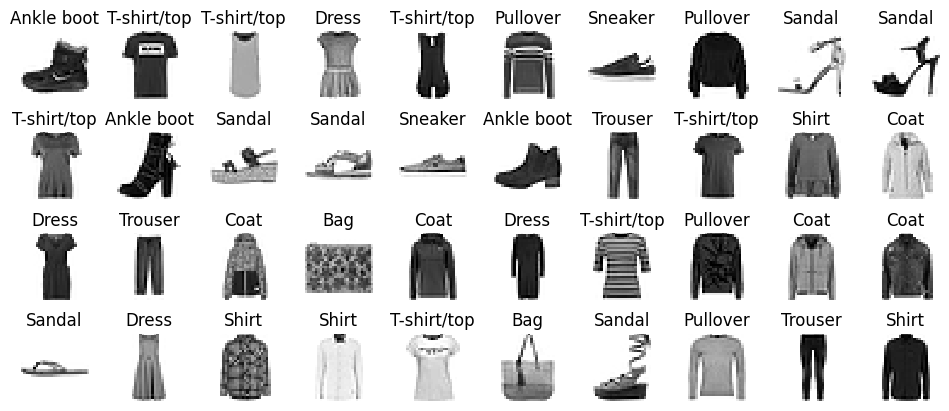

In [51]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [52]:
tf.random.set_seed(42)

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=[28, 28])) # инициализация матрицы инпутов, размер картинки
# model.add(tf.keras.layers.Flatten()) # представление матрицы в 1D массив \ preprocessing
# model.add(tf.keras.layers.Dense(300, activation="relu")) # 1ый скрытый слой
# model.add(tf.keras.layers.Dense(100, activation="relu")) # 2ой скрытый слой
# model.add(tf.keras.layers.Dense(10, activation="softmax")) # 10 для каждого класса, софтмакс пихаем прям сюда

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


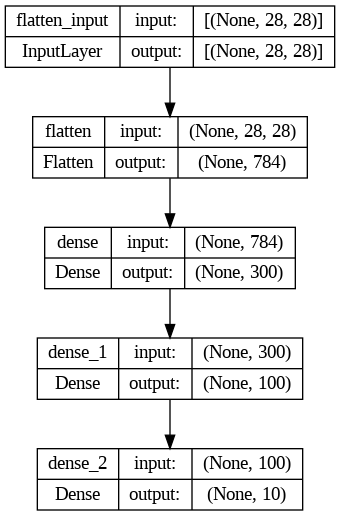

In [65]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [54]:
784*300 # +300 на bias

235200

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
              metrics=["accuracy"])


Тест перехода от категорий к OHE

In [56]:
OHE_lables = tf.keras.utils.to_categorical(y_train)
tf.keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [57]:
np.argmax(OHE_lables, axis=1)

array([9, 0, 0, ..., 9, 0, 2])

In [58]:
np.unique(y_test, return_counts=True)[1]

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

In [59]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# validation_split=0.1
# class_weight and sample_weight for skewed data

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6388 - accuracy: 0.7805 - val_loss: 0.4638 - val_accuracy: 0.8352
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4542 - accuracy: 0.8398 - val_loss: 0.4467 - val_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4079 - accuracy: 0.8539 - val_loss: 0.3968 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3811 - accuracy: 0.8651 - val_loss: 0.3674 - val_accuracy: 0.8708
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3587 - accuracy: 0.8716 - val_loss: 0.3619 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3404 - accuracy: 0.8779 - val_loss: 0.3640 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3273 - accuracy: 0.8801 - val_loss: 0.3476 - val_accuracy:

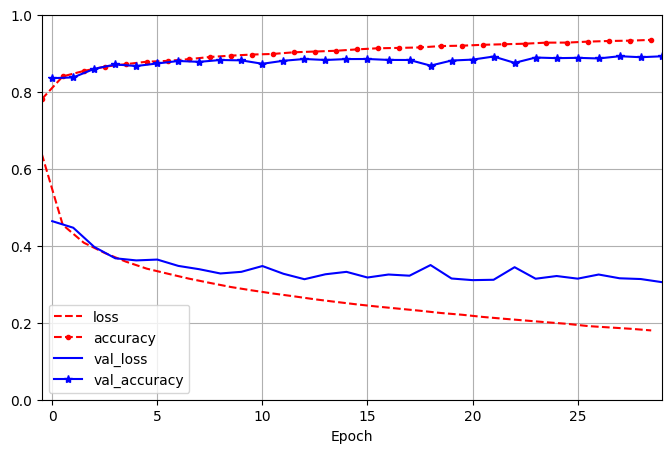

In [66]:
# shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [61]:
# tf.keras.backend.clear_session()

In [67]:
 model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3272 - accuracy: 0.8913


[0.3271671533584595, 0.8913000226020813]

In [68]:
y_proba = model.predict(X_valid)

157/157 [==============================] - 1s 3ms/step


In [75]:
y_pred = y_proba.argmax(axis=-1)

In [97]:
X_to_plot = X_valid[y_pred != y_valid]
y_pred_plot = y_pred[y_pred != y_valid]
y_true_plot = y_valid[y_pred != y_valid]

In [98]:
y_valid

array([0, 8, 0, ..., 3, 0, 5], dtype=uint8)

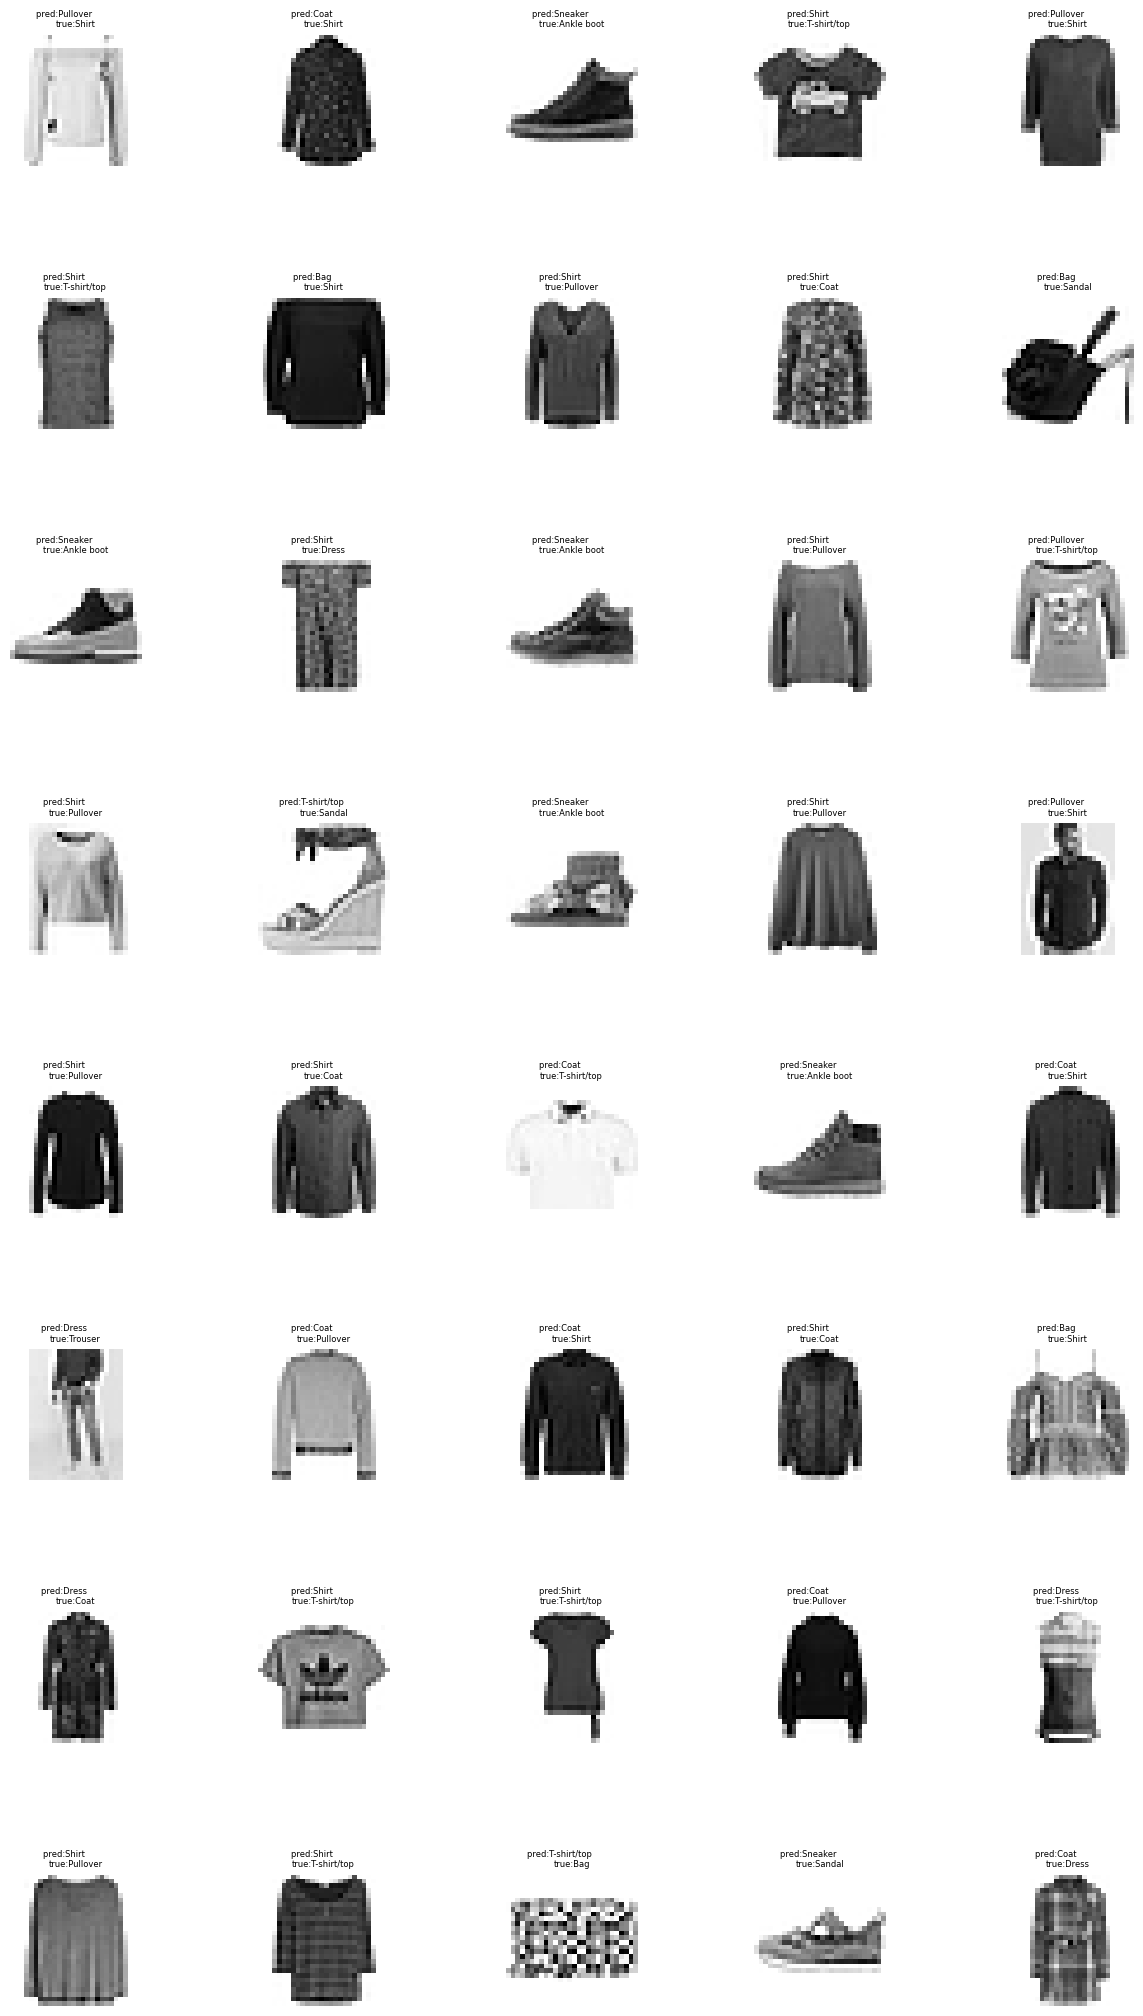

In [100]:
n_rows = 8
n_cols = 5
plt.figure(figsize=(n_cols * 3.2, n_rows * 3.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_to_plot[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(f'pred:{class_names[y_pred_plot[index]]} \
        \ntrue:{class_names[y_true_plot[index]]}', fontsize=6)
plt.subplots_adjust(wspace=0, hspace=1)

plt.show()